# Understanding Churn at Telco

by David Schneemann

## Project Goal

My goal with this project is to identify Telco's key drivers of customer churn and to provide insight into why and how these factors are producing churn. With this information and the following recommendations, our organization can work together to improve business processes and procedures in order to minimize customer churn moving forward.

## Project Description

Losing customers, expressed as churn, is a real issue for the Telco Co. 

In today's business world, the cost of acquiring customers can be steep. Thus, businesses are seeking ways to retain the customers they already have through providing more options to consumers that can meet the needs of a diverse customer population. 

In order to meet the desire for customer retention at Telco Co., we will analyze the attributes (features) of customers who are more or less likely to churn. We will then develop models for predicting churn based on these attributes and provide recommendations and predictions to Telco for reducing churn and predicting churn for their customer base moving forward.

## Initial Questions

##### 1. Do M2m customers churn more than 1-yr or 2-yr customers?
    
- Ho = M2M customers churn <= 1&2-yr customers
- Ha = M2M customers churn > 1&2-yr customers

##### 2. Does paying by electronic check influence churn?

- Ho = Electronic check churn <= other payment types
- Ha = Electronic check churns > other payment types

##### 3. Do customers with Fiber churn more than other internet service types?

- Ho = Fiber internet churn <= DSL or no internet churn
- Ha = Fiber internet churn > DSL or no internet churn

##### 4. Do adults with dependents churn more than other family types?

- Ho = Adults with dependents churn <= adults without dependents and adults with just partner
- Ha = Adults with dependents churn > adults without dependents and adults with just partner

## Data Dictionary

In order to effectively meet our goals, the following module imports are required. \
Below is an extensive list of all modules I imported and used to create and complete the desired analysis for Telco Co.

In [46]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Data handling
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import sklearn.linear_model as slm

# Data acquisition
from pydataset import data

# Data statistics & modeling
from scipy import stats
from model import map_setosa_knn, train_validate_test_split

# Data
import prepare
import env
import prepare
import model
import acquire_telco
import split_telco

| Variable      | Meaning |
| ----------- | ----------- |
| Churn      | Defines whether a customer left their service contract       |
| Monthly Charges   | The average monthly charge per customer        |
| m2m      | Customers who have month to month contracts       |
| yr1      | Customers who have 1-yr contracts       |
| yr2      | Customers who have 1-yr contracts       |
| a_bank_transfer   | Customers who pay via bank transfer (automatic)       |
| a_ccard      | Customers who pay via credit card (automatic)      |
| e_check      | Customers who pay via electronic check       |
| m_check      | Customers who pay via mailed check       |
| p_w_d   | Defines customers who have both a partner and dependents        |
| p_no_d      | Defines customers who have a partner but no dependents|
| d_no_p      | Defines customers who have dependents but no partner  |
| no_pod      | Defines customers who have neither a partner nor dependents       |

## Wrangle Telco Data

To acquire the telco data, I used the telco_db in our mySQL server. I selected all columns from the customers table. I then joined this table with the contract_type, payment_type, and internet_service_type tables.

In [2]:
# py file to acquire data from sql database telco_db
import acquire_telco

# Utilizing our py file function 'get_telco_data' to return our table in the form of a dataframe
df = acquire_telco.get_telco_data()
df.head()

,Unnamed: 0,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,...,payment_type_id,monthly_charges,total_charges,churn,contract_type_id.1,contract_type,payment_type_id.1,payment_type,internet_service_type_id.1,internet_service_type
0,0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,...,2,65.6,593.3,No,2,One year,2,Mailed check,1,DSL
1,1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,...,2,59.9,542.4,No,1,Month-to-month,2,Mailed check,1,DSL
2,2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,...,1,73.9,280.85,Yes,1,Month-to-month,1,Electronic check,2,Fiber optic
3,3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,...,1,98.0,1237.85,Yes,1,Month-to-month,1,Electronic check,2,Fiber optic
4,4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,...,2,83.9,267.4,Yes,1,Month-to-month,2,Mailed check,2,Fiber optic


To clean the data, I did the following:

1. Drop Duplicate Columns: "id" columns such as 'payment_type_id' are duplicates and don't serve a purpose in our table, thus I removed them.
2. Transforming numerical variables: 'total_charges' has whitespace removed and is converted into the appropriate datatype
3. Encoding binary categorical variables: Variables like 'gender', 'partner', and 'dependents' (among others) need to be encoded numerically for exploration and analysis purposes
4. Dummy vars: I attained dummy variables for 'multiple_lines',security choices, streaming choices, and other variables such as 'contract_type'.
5. Concatenate dummy df with original df: I concat our df to include our dummy variables
6. Feature engineering: In order to perform proper exploration and analysis, I create additional features that break down existing variables into more concise values that pinpoint potential causes of churn

In [3]:
# I acquire my prepare.py file, this file includes data cleaning instructions
import prepare

In [4]:
# Utilizing our py file function 'prep_telco_data' to return our dataframe tidy and clean 
df = prepare.prep_telco_data(df)
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,partner_w_dependents,partner_no_dependents,dependents_no_partner,no_pod,male_w_dependents,female_w_dependents,number_relationships
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,...,0,0,1,1,0,0,0,0,0,2
1,Male,0,No,No,9,Yes,Yes,No,No,No,...,0,0,1,0,0,0,1,0,0,0
2,Male,0,No,No,4,Yes,No,No,No,Yes,...,0,1,0,0,0,0,1,0,0,0
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,...,0,1,0,0,1,0,0,0,0,1
4,Female,1,Yes,No,3,Yes,No,No,No,No,...,0,0,1,0,1,0,0,0,0,1


For simplicity, I have separated my 'prepare' and 'split' files. My 'split' file includes functions that split our dataset into train, validate, and test dataframes that allow appropriate statistical analysis.

In [5]:
# acquiring and implementing my 'split' py file and accompanying function
import split_telco

# calling the function and applying it to our df
train, validate, test = split_telco.telco_split_explore(df)

In [6]:
# confirming data is properly wrangled, cleaned, and split
train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,partner_w_dependents,partner_no_dependents,dependents_no_partner,no_pod,male_w_dependents,female_w_dependents,number_relationships
5919,Female,0,No,No,58,Yes,Yes,Yes,Yes,Yes,...,1,0,0,0,0,0,1,0,0,0
1915,Male,0,No,Yes,71,Yes,Yes,Yes,Yes,No,...,1,0,0,0,0,1,0,1,0,1
5054,Female,0,Yes,Yes,35,Yes,Yes,No internet service,No internet service,No internet service,...,0,1,0,1,0,0,0,0,0,2
2355,Male,0,Yes,Yes,1,Yes,No,No internet service,No internet service,No internet service,...,0,0,1,1,0,0,0,0,0,2
6279,Male,1,No,No,20,Yes,No,Yes,No,No,...,0,0,1,0,0,0,1,0,0,0


## Set the Data Context

Our dataset contains customer information from the Telco Company.

26.6% of customers churned. We have data from 7032 customers, 3875 of which are month to month customers, 2365 of which payed by electronic check, and 3280 of which are single adults (no partner or dependents). The average monthly charge for all customers was $64.80.

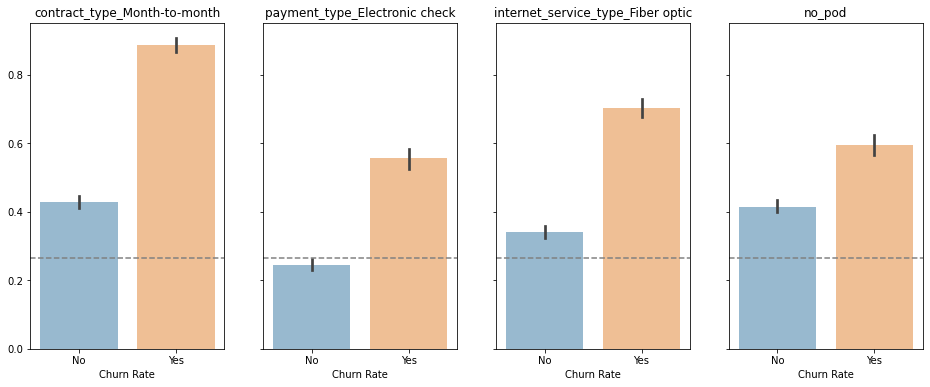

In [7]:
# My visualization setting the context of the data
# This visual shows churn rate of the four most prominent features I explore
features = ['contract_type_Month-to-month', 'payment_type_Electronic check', 'internet_service_type_Fiber optic','no_pod']

enumerate(features)

list(enumerate(features))

churn_rate = train.churn_encoded.mean()
_, ax = plt.subplots(nrows=1, ncols=4, figsize=(16, 6), sharey=True)
for i, feature in enumerate(features):
    sns.barplot('churn', feature, data=train
                , ax=ax[i], alpha=0.5)
    ax[i].set_xlabel('Churn Rate')
    ax[i].set_ylabel('')
    ax[i].set_title(feature)
    ax[i].axhline(churn_rate, ls='--', color='grey')

## Exploratory Analysis: [question]

I have answered these questions:

1. Do M2m customers churn more than 1-yr or 2-yr customers?
2. Does paying by electronic check influence churn? Do customers paying by electronic check churn more than other payment types?
3. Do customers with Fiber churn more than other internet service types?
4. Do adults with dependents churn more than adults without dependents? Furthermore, are single adults more likely to churn than customers with a partner?

### Question 1

Do M2m customers churn more than 1-yr or 2-yr customers? \
If so, what are potential underlying causes of this high churn rate?

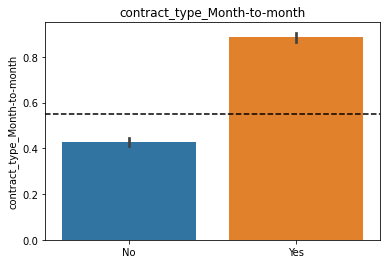

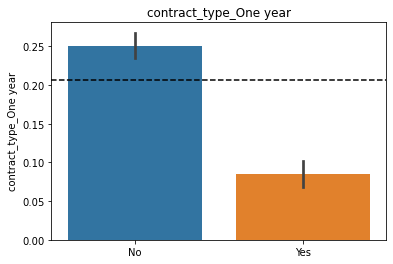

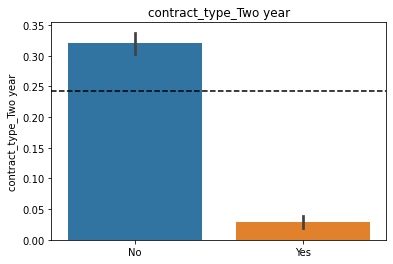

In [8]:
# Barplot expressing churn rate of customers by contract type: Month-to-Month, 1-yr, and 2-yr contracts
variables = ['contract_type_Month-to-month', 'contract_type_One year', 'contract_type_Two year']

mean = [train['contract_type_Month-to-month'].mean(), train['contract_type_One year'].mean(), train['contract_type_Two year'].mean()]

for x in range(0,3):
    sns.barplot('churn',variables[x], data=train)
    
    plt.xlabel('')
    plt.title(variables[x])
    plt.axhline(mean[x], ls = '--', color = 'black')
    plt.show()

In [9]:
# Chi-squared test determining whether Month-to-Month churn rate is statistically significant

#   Ho = M2M customers churn <= 1&2-yr customers
#   Ha = M2M customers churn > 1&2-yr customers

m2m_stat = pd.crosstab(train['contract_type_Month-to-month'], train.churn_encoded)

print(m2m_stat)

a = 0.05

chi2, p, degf, expected = stats.chi2_contingency(m2m_stat)

chi2, p


if p < a:
    print("We reject the null hypothesis and this variable is statistically significant")
else:
    print("We fail to reject the null hypothesis and this feature is not statisitcally significant")

churn_encoded                    0    1
contract_type_Month-to-month           
0                             1653  119
1                             1238  927
We reject the null hypothesis and this variable is statistically significant


In [72]:
# Chi-squared test determining whether 1-yr churn rate is statistically significant

#   Ho = 1-yr customers churn <= other contract types
#   Ha = 1-yr customers churn > other contract types

yr1_stat = pd.crosstab(train['contract_type_One year'], train.churn_encoded)

print(yr1_stat)

a = 0.05

chi2, p, degf, expected = stats.chi2_contingency(yr1_stat)

chi2, p


if p < a:
    print("We reject the null hypothesis and this variable is statistically significant")
else:
    print("We fail to reject the null hypothesis and this feature is not statisitcally significant")

churn_encoded              0    1
contract_type_One year           
0                       2165  957
1                        726   89
We reject the null hypothesis and this variable is statistically significant


In [73]:
# Chi-squared test determining whether 2-yr churn rate is statistically significant

#   Ho = 2-yr customers churn <= other contract types
#   Ha = 2-yr customers churn > other contract types

yr2_stat = pd.crosstab(train['contract_type_Two year'], train.churn_encoded)

print(yr2_stat)

a = 0.05

chi2, p, degf, expected = stats.chi2_contingency(yr2_stat)

chi2, p


if p < a:
    print("We reject the null hypothesis and this variable is statistically significant")
else:
    print("We fail to reject the null hypothesis and this feature is not statisitcally significant")

churn_encoded              0     1
contract_type_Two year            
0                       1964  1016
1                        927    30
We reject the null hypothesis and this variable is statistically significant


### Answer 1

Customers with Month-to-Month contracts are much more likely to churn compared to those with 1 or 2 year contracts. Yet both 1 and 2 year contracts are statistically significant, so we will use all three features in our models moving forward.

### Question 2

Does paying by electronic check lead to a higher churn rate? \
If so, what are the potential underlying factors of this phenomenon?

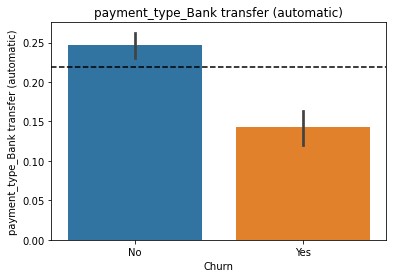

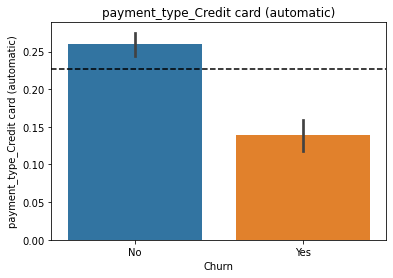

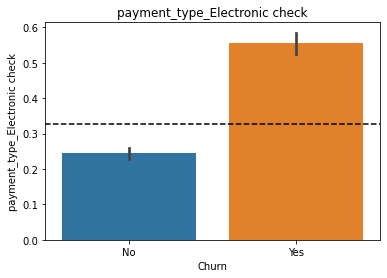

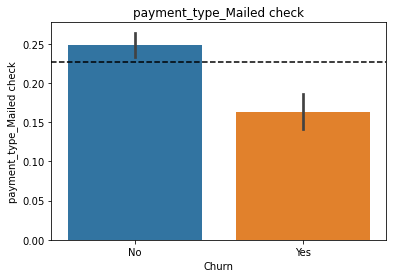

In [10]:
# Barplot expressing churn rate of customers by payment type: bank transfer, cc, e-check, mailed-check
variables = ['payment_type_Bank transfer (automatic)', 'payment_type_Credit card (automatic)', 'payment_type_Electronic check', 'payment_type_Mailed check']

mean = [train['payment_type_Bank transfer (automatic)'].mean(), train['payment_type_Credit card (automatic)'].mean(), train['payment_type_Electronic check'].mean(), train['payment_type_Mailed check'].mean()]

for x in range(0,4):
    sns.barplot('churn',variables[x], data=train)
    
    plt.xlabel('Churn')
    plt.title(variables[x])
    plt.axhline(mean[x], ls = '--', color = 'black')
    plt.show()

In [11]:
# Chi-squared test determining whether churn rate for customers who pay by electronic check is statistically significant

#   Ho = Electronic check churn <= other payment types
#   Ha = Electronic check churn > other payment types

e_check_stat = pd.crosstab(train['payment_type_Electronic check'], train.churn_encoded)

print(e_check_stat)

a = 0.05

chi2, p, degf, expected = stats.chi2_contingency(e_check_stat)

chi2, p


if p < a:
    print("We reject the null hypothesis and this variable is statistically significant")
else:
    print("We fail to reject the null hypothesis and this feature is not statisitcally significant")

churn_encoded                     0    1
payment_type_Electronic check           
0                              2183  465
1                               708  581
We reject the null hypothesis and this variable is statistically significant


In [12]:
# Chi-squared test determining whether churn rate for customers who pay by electronic check is statistically significant

#   Ho = Bank transfer churn <= other payment types
#   Ha = Bank transfer churn > other payment types

bank_tr_stat = pd.crosstab(train['payment_type_Bank transfer (automatic)'], train.churn_encoded)

print(bank_tr_stat)

a = 0.05

chi2, p, degf, expected = stats.chi2_contingency(bank_tr_stat)

chi2, p


if p < a:
    print("We reject the null hypothesis and this variable is statistically significant")
else:
    print("We fail to reject the null hypothesis and this feature is not statisitcally significant")

churn_encoded                              0    1
payment_type_Bank transfer (automatic)           
0                                       2178  897
1                                        713  149
We reject the null hypothesis and this variable is statistically significant


In [13]:
# Chi-squared test determining whether churn rate for customers who pay by electronic check is statistically significant

#   Ho = Credit card churn <= other payment types
#   Ha = Credit card churn > other payment types

a_cc_stat = pd.crosstab(train['payment_type_Credit card (automatic)'], train.churn_encoded)

print(a_cc_stat)

a = 0.05

chi2, p, degf, expected = stats.chi2_contingency(a_cc_stat)

chi2, p


if p < a:
    print("We reject the null hypothesis and this variable is statistically significant")
else:
    print("We fail to reject the null hypothesis and this feature is not statisitcally significant")

churn_encoded                            0    1
payment_type_Credit card (automatic)           
0                                     2141  901
1                                      750  145
We reject the null hypothesis and this variable is statistically significant


In [14]:
# Chi-squared test determining whether churn rate for customers who pay by electronic check is statistically significant

#   Ho = Mailed check churn <= other payment types
#   Ha = Mailed check churns > other payment types

m_check_stat = pd.crosstab(train['payment_type_Mailed check'], train.churn_encoded)

print(m_check_stat)

a = 0.05

chi2, p, degf, expected = stats.chi2_contingency(m_check_stat)

chi2, p


if p < a:
    print("We reject the null hypothesis and this variable is statistically significant")
else:
    print("We fail to reject the null hypothesis and this feature is not statisitcally significant")

churn_encoded                 0    1
payment_type_Mailed check           
0                          2171  875
1                           720  171
We reject the null hypothesis and this variable is statistically significant


### Answer 2

Customers who pay by electronic check are more likely to churn than those who pay via alternative payments types. \
Additionally, those alternative payments show an opposing correlation and are also statistically significant (worth including in analysis).

### Question 3

Do customers with Fiber churn more than other internet service types?

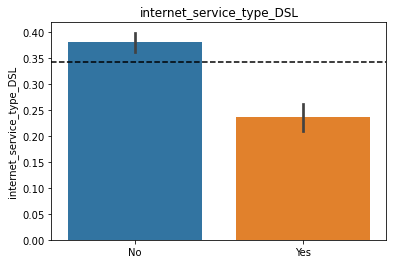

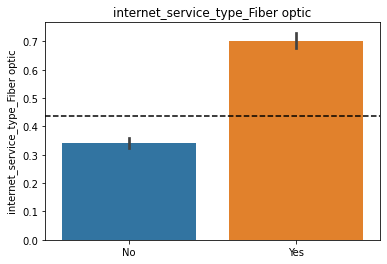

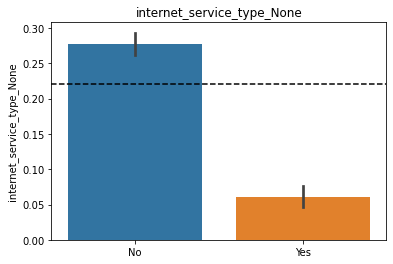

In [15]:
# Barplot expressing churn rate of customers by internet type: Fiber, DSL, or none
variables = ['internet_service_type_DSL', 'internet_service_type_Fiber optic', 'internet_service_type_None']

mean = [train['internet_service_type_DSL'].mean(), train['internet_service_type_Fiber optic'].mean(), train['internet_service_type_None'].mean()]

for x in range(0,3):
    sns.barplot('churn',variables[x], data=train)
    
    plt.xlabel('')
    plt.title(variables[x])
    plt.axhline(mean[x], ls = '--', color = 'black')
    plt.show()

In [16]:
# Chi-squared test determining whether churn rate for customers with Fiber internet is statistically significant

#   Ho = Fiber internet churn <= other internet types
#   Ha = Fiber internet churn > other internet types


fiber_stat = pd.crosstab(train['internet_service_type_Fiber optic'], train.churn_encoded)

print(fiber_stat)

a = 0.05

chi2, p, degf, expected = stats.chi2_contingency(fiber_stat)

chi2, p

print('--------------------------------------------')

print(f'p: {p}')

if p < a:
    print("We reject the null hypothesis and this variable is statistically significant")
else:
    print("We fail to reject the null hypothesis and this feature is not statisitcally significant")

churn_encoded                         0    1
internet_service_type_Fiber optic           
0                                  1904  311
1                                   987  735
--------------------------------------------
p: 2.831419548361709e-90
We reject the null hypothesis and this variable is statistically significant


In [17]:
# Chi-squared test determining whether churn rate for customers with DSL internet is statistically significant

#   Ho = DSL internet churn <= other internet types
#   Ha = DSL internet churn > other internet types

dsl_stat = pd.crosstab(train['internet_service_type_DSL'], train.churn_encoded)

print(dsl_stat)

a = 0.05

chi2, p, degf, expected = stats.chi2_contingency(dsl_stat)

chi2, p

print('--------------------------------------')

print(f'p: {p}')

if p < a:
    print("We reject the null hypothesis and this variable is statistically significant")
else:
    print("We fail to reject the null hypothesis and this feature is not statisitcally significant")

churn_encoded                 0    1
internet_service_type_DSL           
0                          1790  799
1                          1101  247
--------------------------------------
p: 3.983806924956342e-17
We reject the null hypothesis and this variable is statistically significant


In [18]:
# Chi-squared test determining whether churn rate for customers with NO internet is statistically significant

#   Ho = No internet churn <= other internet types
#   Ha = No internet churn > other internet types

no_net_stat = pd.crosstab(train['internet_service_type_None'], train.churn_encoded)

print(no_net_stat)

a = 0.05

chi2, p, degf, expected = stats.chi2_contingency(no_net_stat)

chi2, p

print('--------------------------------------------')

print(f'p: {p}')

if p < a:
    print("We reject the null hypothesis and this variable is statistically significant")
else:
    print("We fail to reject the null hypothesis and this feature is not statisitcally significant")

churn_encoded                  0    1
internet_service_type_None           
0                           2088  982
1                            803   64
--------------------------------------------
p: 2.8653012180661676e-47
We reject the null hypothesis and this variable is statistically significant


### Answer 3

Customers with Fiber internet are shown to be more likely to churn than other internet service types. \
Additionally, all internet types: Fiber, DSL, and no internet are statistically significant

### Question 4

Are adults with dependents (d_no_p) more likely to churn than adults without dependents (no_pod)? Furthermore, are single adults more likely to churn than customers with a partner?

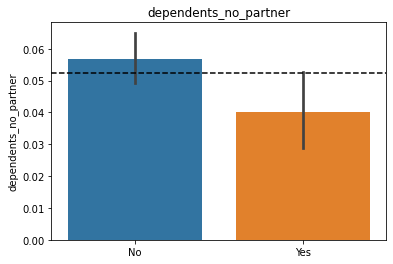

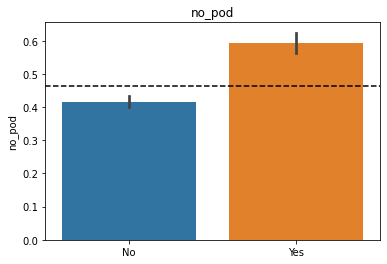

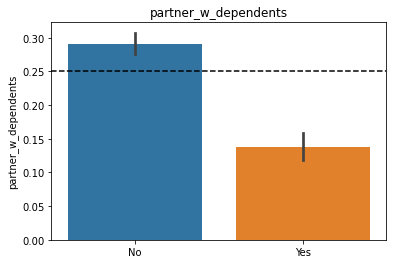

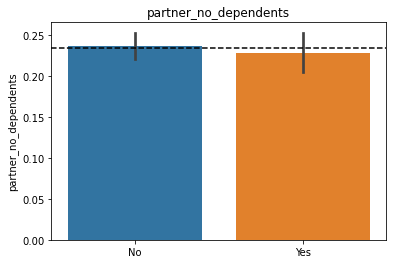

In [19]:
# Barplot expressing churn rate of customers by dependent status: Single Adults no dependents vs. Single Adults with dependents
variables = ['dependents_no_partner', 'no_pod', 'partner_w_dependents', 'partner_no_dependents']

mean = [train['dependents_no_partner'].mean(), train['no_pod'].mean(), train['partner_w_dependents'].mean(), train['partner_no_dependents'].mean()]

for x in range(0,4):
    sns.barplot('churn',variables[x], data=train)
    
    plt.xlabel('')
    plt.title(variables[x])
    plt.axhline(mean[x], ls = '--', color = 'black')
    plt.show()

In [20]:
# Chi-squared test determining whether churn rate for customers with no partner or dependents is statistically significant

#   Ho = single adult (no_pod) churn <= other family types
#   Ha = single adult (no_pod) churn > other family types

no_pod_stat = pd.crosstab(train['no_pod'], train.churn_encoded)

print(no_pod_stat)

a = 0.05

chi2, p, degf, expected = stats.chi2_contingency(no_pod_stat)

chi2, p


if p < a:
    print("We reject the null hypothesis and this variable is statistically significant")
else:
    print("We fail to reject the null hypothesis and this feature is not statisitcally significant")

churn_encoded     0    1
no_pod                  
0              1691  425
1              1200  621
We reject the null hypothesis and this variable is statistically significant


In [21]:
# Chi-squared test determining whether churn rate for customers with dependents but no partner is statistically significant

#   Ho = customers with dependents, no partner (d_no_p) churn <= other family types
#   Ha = customers with dependents, no partner (d_no_p) churn > other family types

d_no_p_stat = pd.crosstab(train['dependents_no_partner'], train.churn_encoded)

print(d_no_p_stat)

a = 0.05

chi2, p, degf, expected = stats.chi2_contingency(d_no_p_stat)

chi2, p


if p < a:
    print("We reject the null hypothesis and this variable is statistically significant")
else:
    print("We fail to reject the null hypothesis and this feature is not statisitcally significant")

churn_encoded             0     1
dependents_no_partner            
0                      2727  1004
1                       164    42
We reject the null hypothesis and this variable is statistically significant


In [22]:
# Chi-squared test determining whether churn rate for customers with a partner & dependents is statistically significant

#   Ho = customers with a partner & dependents (p_w_d) churn <= other family types
#   Ha = customers with a partner & dependents (p_w_d) churn > other family types

p_w_d_stat = pd.crosstab(train['partner_w_dependents'], train.churn_encoded)

print(p_w_d_stat)

a = 0.05

chi2, p, degf, expected = stats.chi2_contingency(p_w_d_stat)

chi2, p


if p < a:
    print("We reject the null hypothesis and this variable is statistically significant")
else:
    print("We fail to reject the null hypothesis and this feature is not statisitcally significant")

churn_encoded            0    1
partner_w_dependents           
0                     2049  902
1                      842  144
We reject the null hypothesis and this variable is statistically significant


### Answer 4

Customers with no partner but with dependents (d_no_p) are NOT more likely to churn than adults without dependents (no_pod)? However, this customer group is still statistically significant. \
In addition to no_pod being statistically significant as proven above, customers with dependents but no partner also expresses statistical significance.

### Summary: Who is most likely to churn?

My exploration demonstrates the following key takeaways: 
- Month-to-Month contract customers are much more likely to churn than either 1 or 2 year contracts.
- Customers who pay via electronic check are more likely to churn than any other payment type
- Fiber internet customers are more likely to churn than other internet types
- Customers with no partner nor dependents churn less 

Since most of my observed features are statistically significant, I'll be moving forward with the majority of these features. \
Of those selected features, a majority are statistically significant but also indicate being less likely to churn as opposed to more. \
The following are features that are MORE likely to churn:

1. Month-to-Month contract
2. Electronic Check payment
3. Fiber internet
4. No partner or dependents (single adults)

List of additional features moving forward; LESS likely to churn:

1. 1 year contract
2. 2 year contract
3. Bank Transfer
4. Credit Card Transfer
5. Mailed Check
6. DSL internet
7. No internet
8. Dependents, no partner
9. Partner and dependents

Features I chose not to move forward with:

1. Partner, no dependents (due to statistical insignificance)

In [23]:
x_vars = ['contract_type_Month-to-month', 'contract_type_One year', 'contract_type_Two year', 'payment_type_Bank transfer (automatic)', 'payment_type_Credit card (automatic)', 'payment_type_Electronic check', 'payment_type_Mailed check', 'internet_service_type_DSL', 'internet_service_type_Fiber optic', 'internet_service_type_None', 'no_pod', 'partner_w_dependents', 'dependents_no_partner', 'tenure']

## Predicting Churn

Because churn is a boolean/yes or no value, we will use classification machine learning algorithms, namely Random Forest, KNN, and Logistic Regression, to fit to our training data. Then, we will evaluate on validate. We will pick the best model using accuracy because the data is mostly balanced, and the risk of an event happening offsets the risk of getting a prediction wrong.

#### Baseline

I will now set a baseline prediction by predicting that all customers will not churn. Below, I evaluate the accuracy of this prediction.

In [24]:
# I create the variable `baseline`, setting all values equal to 0 (which indicates no churn).
train['baseline'] = 0

In [25]:
# I find the baseline accuracy by taking the mean of our prediction set against actual churn
baseline_accuracy = (train.churn_encoded == train.baseline).mean()

print(f'baseline accuracy: {baseline_accuracy:.2%}')

baseline accuracy: 73.43%


### Fit 3 models

In order to split our dataset into x & y train, validate, and test, I call the other function within my split_telco.py file:

In [26]:
# Calling my split function specific to modeling
x_train, y_train, x_validate, y_validate, x_test, y_test = split_telco.telco_split_model(df)

The top 3 models I built were:

- Random Forest
- KNN
- Logistic Regression

These models all used the same set of features and were looped to determine the optimal hyperparameters for maximum accuracy.

Random Forest performed best with an accuracy of __%

#### Random Forest

In our explore file, our Random Forest model was constructed within a loop that processed 23 iterations of our hyperparameter, max depth. The resulting dataframe allowed us to choose the most effective iteration after fitting against both our train and validate datasets.

In [54]:
# Utilizing a loop in my explore file, 
# I have determined best fit using a max depth of 5
metrics = []

# Making the model
forest = RandomForestClassifier(max_depth=5, random_state=123)

# Fitting the model (on train only)
forest = forest.fit(x_train, y_train)

# Using the model
# We'll evaluate the model's performance on train, first
in_sample_accuracy = forest.score(x_train, y_train)
    
# We now evaluate the model's performance on validate, to compare
out_of_sample_accuracy = forest.score(x_validate, y_validate)

output = {
    "max_depth": 5,
    "train_accuracy": in_sample_accuracy,
    "validate_accuracy": out_of_sample_accuracy
    }
    
metrics.append(output)
    
## We now compile our metrics into a dataframe and create a column 
# showing the difference in our train and validate accuracy performance
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,5,0.801372,0.785545,0.015827


#### KNN

In our explore file, our K-nearest-neighbors model was constructed within a loop that processed 20 iterations of our hyperparameter, k. The resulting dataframe allowed us to choose the most effective iteration after fitting against both our train and validate datasets.

In [62]:
# Utilizing a loop in my explore file, 
# I have determined best fit using k = 18

metrics = []
            
# Defining the model
knn = KNeighborsClassifier(n_neighbors=18)
    
# Fitting the model (only on training data)
knn.fit(x_train, y_train)
    
# Using the model to calculate accuracy on both train and validate
train_accuracy = knn.score(x_train, y_train)
validate_accuracy = knn.score(x_validate, y_validate)
    
output = {
    "k": 18,
    "train_accuracy": train_accuracy,
    "validate_accuracy": validate_accuracy
    }
    
metrics.append(output)

## We now compile our metrics into a dataframe 
results = pd.DataFrame(metrics)

In [63]:
# Once again, creating this column showing the difference in our 
# train and validate accuracy performance
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,k,train_accuracy,validate_accuracy,difference
0,18,0.801372,0.772512,0.02886


#### Logistic Regression

In our explore file, our Logistic Regression model was constructed within a loop that processed 7 iterations of our hyperparameter, C. The resulting dataframe allowed us to choose the most effective iteration after fitting against both our train and validate datasets.

In [67]:
# Defining and fitting the model. 
# Utilizing a loop in my explore file, 
# I have determined best fit using the value of C: 0.01
model = sklearn.linear_model.LogisticRegression(C=0.01)
model.fit(x_train, y_train)
accuracy = model.score(x_validate, y_validate)
coefs = dict(zip(x_train.columns, model.coef_[0]))

In [68]:
# Creating a function for C
def evaluate_model(c):
    model = sklearn.linear_model.LogisticRegression(C=c)
    model.fit(x_train, y_train)
    accuracy = model.score(x_validate, y_validate)
    coefs = dict(zip(x_train.columns, model.coef_[0]))
    return {'C': c, 'accuracy': accuracy, **coefs}

# Selecting the appropriate C value
models = [evaluate_model(c) for c in [.01]]

# Returning our dataframe, which expresses the optimal C value 
# and accuracy in tandem with the coefficients for each feature
(pd.DataFrame(models).round(3)
 .set_index(['C', 'accuracy'])
 .style
 .set_caption('Effect of optimal C value on accuracy (t=.5) and the resulting coefficients.')
 .set_precision(3)
)

,,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,no_pod,partner_w_dependents,dependents_no_partner,tenure
C,accuracy,,,,,,,,,,,,,,
0.010000,0.778000,0.428,-0.148,-0.280,-0.036,-0.064,0.315,-0.216,-0.190,0.723,-0.533,0.021,-0.140,-0.071,-0.033


#### Predict and Evaluate Test dataset
None of these models appear to be overfit. The Random Forest model performed the best on the validate sample, therefore, I am moving forward with that model. 

Below is the Random Forest model, fit to train, validate, and test.

In [71]:
# Using our loop in the explore file once more, 
# I determine optimal max depth for maximum accuracy: max_depth = 5

metrics = []

# Making the model
forest = RandomForestClassifier(max_depth=5, random_state=123)

# Fitting the model (on train only)
forest = forest.fit(x_train, y_train)

# Using the model
# We'll evaluate the model's performance on train, first
in_sample_accuracy = forest.score(x_train, y_train)
    
# We now evaluate the model's performance on validate, to compare
out_of_sample_accuracy = forest.score(x_validate, y_validate)

# We now evaluate the model's performance on test, to compare
test_accuracy = forest.score(x_test, y_test)

output = {
    "max_depth": 5,
    "train_accuracy": in_sample_accuracy,
    "validate_accuracy": out_of_sample_accuracy,
    "test_accuracy": test_accuracy
    }
    
metrics.append(output)
    
## We now compile our metrics into a dataframe and create a column 
# showing the difference in our train and validate accuracy performance
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df["test_diff"] = df.validate_accuracy - df.test_accuracy
df

,max_depth,train_accuracy,validate_accuracy,test_accuracy,difference,test_diff
0,5,0.801372,0.785545,0.803127,0.015827,-0.017582


I expect this model to perform with 80% accuracy in the future on data it has not seen, given no major changes in our data source.
This model's accuracy is best at a max depth of 5.

## Conclusion

### Summary

In seeking solutions to Telco's churn, we have explored a multiplicity of factors in the dataset that affect churn rate. We have shown that some potential primary drivers of churn are :

- Having a month-to-month contract
- Paying by electronic check 
- Paying for fiber internet
- Having a contract as a single adult, without a partner or dependents.

The statistical significance of these features, combined within our analysis and models, expresses 95% confidence in the validity of our findings. With the addition of the other features within contract type, payment type, internet type, and family type, we have created robust models that perform significantly better than our baseline of 73%.

Having fit the best performing model to our train, validate, and test datasets, we expect this model to perform with 80% accuracy in the future on data it has not seen, given no major changes to our data source.

### Recommendations

There are a number of recommendations that can be offered based on the above analysis. These suggestions are tied directly to the findings within each of our primary drivers of churn:

1. Month-to-Month contracts - Although month-to-month contracts are here to stay, we could feasibly limit churn by offering a discount on 1 and 2 yr contracts. By offering a discount that still maintains a healthy profit margin, we could incentivize customers to sign on for longer contracts which is shown to reduce churn in the long term.

2. Electronic check - We have shown that churn is significantly higher for electronic check customers than any other payment type. Although there are multiple potential solutions to this phenomenon, I believe Telco needs to perform a full review of the customer process for submitting payment via electronic check. It is my experience that online portals for submitting payment by e-check can be inefficient, not well designed, and frustrating to the user. This could be a significant reason why customers who use this method of payment are cancelling their contracts.

3. Fiber internet - Customers with this internet type express a significant likelihood of churn, despite Fiber being the optimal option for internet access. Although fiber is undoubtedly more expensive to implement, due to infrastructure costs, the amount of potential churn of this internet type needs to inform our business practices. Options include a potential discount for fiber customers if this is profitably viable. Otherwise, increased company investment in fiber infrastructure may lead to increased profit margin down the road, allowing the company greater leverage for retaining these customers. 

4. Customers with no partner or dependents (single adults) - This customer demographic has a significant likelihood of churn. Yet, attempting to retain these customers may not be the most effective option for maximizing customer retention. Instead, by observing the likelihood of churn for other partner/dependent statuses, we find that customers with dependents are less likely to churn. Therefore, offering a family discount for those customers who have dependents could attract more customers who fall under this demographic. This customer base has shown to be less likely to churn, thus decreasing potential churn by attracting more stable and committed customers.





### Next Steps

Despite the overall effectiveness of our best-performing model, there is always room for improvement and optimization. \
If given more time to pursue a better results, I would begin by further exploration and analysis of other features within our dataset. Through additional exploration I've already performed, I can say with confidence that there are a number of features I could analyze and implement into my models to improve prediction accuracy. \
Namely, observing features such as whether a customer has online security or tech support could improve our models' predictions.

Additionally, prompting customers who churn to fill out a simple satisfaction survey could produce meaningful insight into more specific reasons customers choose to cancel their contracts. This information could be analyzed using methods such as Natural Language Processing in order to improve Telco's understanding of its customers' needs and the resulting customer service they provide.

### Preparing a CSV with the best model's predictions

In [40]:
# Reacquiring the data to have a fresh dataset with all columns
csv_df = acquire_telco.get_telco_data()

In [41]:
csv_df = prepare.prep_telco_csv(csv_df)

In [42]:
predict_telco = csv_df[x_vars]

In [48]:
csv_df['probability'] = forest.predict_proba(predict_telco)[:,1]

In [49]:
csv_df['prediction'] = forest.predict(predict_telco)

In [50]:
prediction_probability = csv_df[['customer_id','probability','prediction']]

In [51]:
# Checking code
prediction_probability.head()

,customer_id,probability,prediction
0,0002-ORFBO,0.000000,No
1,0003-MKNFE,0.455648,No
2,0004-TLHLJ,0.739163,Yes
3,0011-IGKFF,1.000000,Yes
4,0013-EXCHZ,0.957778,Yes


In [52]:
# Reading to csv file
# prediction_probability.to_csv('telco_prediction_probability.csv')